In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [3]:
sns.scatterplot(X[:,0],X[:,1],hue=y)

TypeError: ignored

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

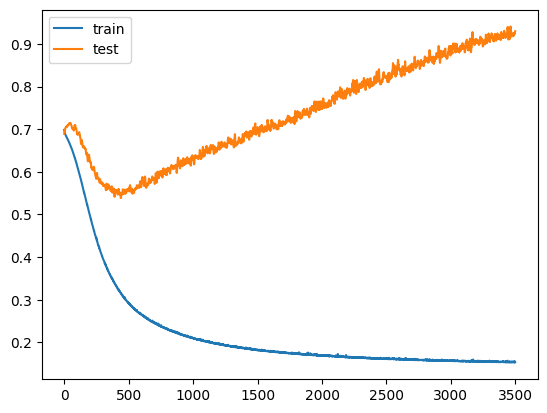

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 13s 1ms/step


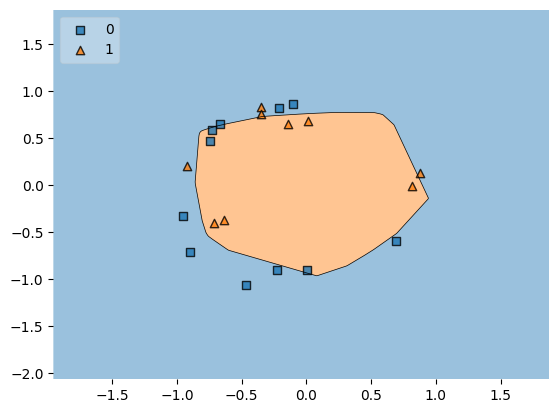

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [11]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 108ms/step - loss: 0.6934 - accuracy: 0.5250 - val_loss: 0.6976 - val_accuracy: 0.5000
Epoch 2/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.6916 - accuracy: 0.5000 - val_loss: 0.7001 - val_accuracy: 0.5500
Epoch 3/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6896 - accuracy: 0.5125 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 4/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6886 - accuracy: 0.5250 - val_loss: 0.7026 - val_accuracy: 0.3000
Epoch 5/3500
3/3 [==============================] - 0s 21ms/step - loss: 0.6875 - accuracy: 0.5375 - val_loss: 0.7042 - val_accuracy: 0.3000
Epoch 6/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.6868 - accuracy: 0.5750 - val_loss: 0.7056 - val_accuracy: 0.3000
Epoch 7/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6858 - accuracy: 0.5625 - val_loss: 0.7079 - val_accuracy: 0.3500
Epoch 8/3500

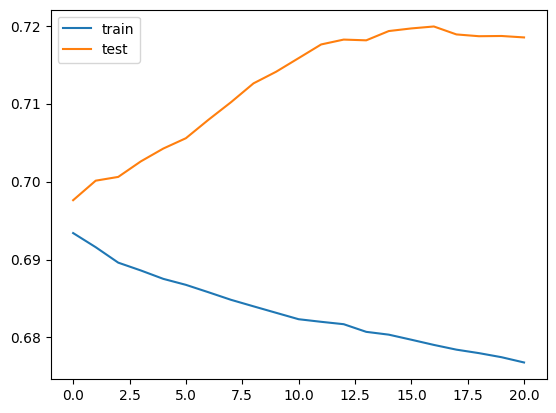

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 13s 1ms/step


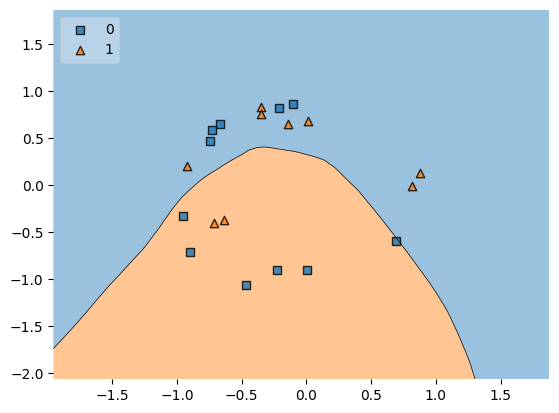

In [16]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()